In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

 - 시간과 날짜 컬럼등은 데이터에 따라 포맷이 다른 경우가 많다.
 - 이때 단순하게 merge를 적용하면 결과는 나오지만, 비정상적인 병합이 될 수도 있다.
 - 따라서, `하나의 날짜/시간 컬럼을 다른 하나의 컬럼과 동일한 포맷으로 변경`해주어야 한다.

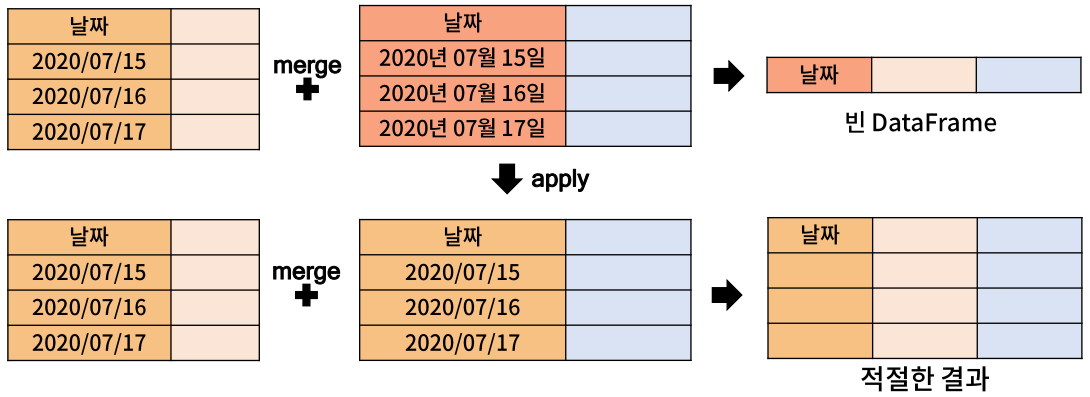

# 관련 문법 : Series.apply
---
- Series에 있는 모든 요소에 func를 `일괄 적용` 하는 함수 (map 함수와 유사하다)
- apply함수는 `머신러닝 코드의 효율성 증가`에 매우 유용한 함수이다.


주요 파라미터
- func : Series의 한 요소를 처리하는 함수

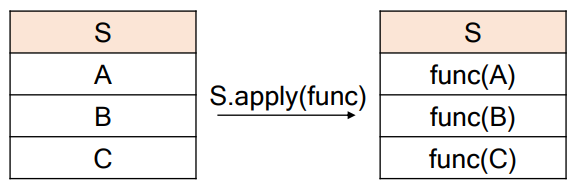

In [2]:
df1 = pd.read_csv("날짜포맷이다른데이터1.csv") #YYYY-MM-DD 형태
df2 = pd.read_csv("날짜포맷이다른데이터2.csv") #YYYY년 MM월 DD일 형태

In [3]:
df1.head()

,날짜,V1
0,2018-01-01,0.330646
1,2018-01-02,0.418242
2,2018-01-03,0.307254
3,2018-01-04,0.441689
4,2018-01-05,0.402440


In [4]:
df2.head()

,날짜,V2
0,2018년 1월 1일,0.936350
1,2018년 1월 2일,0.658967
2,2018년 1월 3일,0.895686
3,2018년 1월 4일,0.047194
4,2018년 1월 5일,0.520925


서로 다른 포멧의 데이터여서 merge를 해도 빈칸으로 결합이 되기는 한다.

In [5]:
# 아래의 2가지 방법으로 모두 가능

merged_df1 = pd.merge(df1, df2, on='날짜')

In [6]:
merged_df2 = df1.merge(df2, on='날짜')

In [7]:
merged_df1

,날짜,V1,V2


In [8]:
merged_df2

,날짜,V1,V2


하지만 제대로된 병합이 되지 않는다.

따라서, 둘중 하나의 형식으로 날짜데이터의 포멧을 바꿔줄 필요가 있다.(포맷 통일)

- df1의 날짜에서 '-'를 기준으로 분할(split)한 뒤에 각각의 분할된 데이터에 '년' ,'월' , '일' 을 붙여주는 방식으로 포맷 통일을 진행

## 날짜 format 변경 함수 생성
---
- df1의 날짜 타입을 df2의 날짜 타입으로 변경하는 함수 작성 및 적용
-  apply() 함수에 적용시킬 것이기 때문에 각 요소에 모두 적용이 가능하도록 작성되어야 한다.
-  value : -으로 연결된 날짜 포멧의 값들
----
- MM에만 str(int(MM))를 두른 이유 : 
    - df1의 MM부분은 1자리수의 month의 경우 앞에 0이 붙어 있다. (01, 02, 03 등)
    - 이를 df2의 형식과 일치 시키기 위해 int형으로 먼저 변경해서 0을 제거한 뒤 문자형(str)로 변경해서 '월' 과 붙여주는 것


- 주의 사항 : 2018년 뒤에 공백이 1칸 있다. 그래서 "년"이 아니고 "년 " 이다. (월도 마찬가지)

In [9]:
def date_type_converter(value):
    YYYY, MM, DD = value.split('-')
    return YYYY + "년 " + str(int(MM)) + "월 " + str(int(DD)) + "일"

## 함수 적용

In [10]:
#함수 적용
df1['날짜'] = df1['날짜'].apply(date_type_converter)

## 데이터 병합

In [11]:
# 데이터 병합
merged_df = pd.merge(df1, df2, on = '날짜')

In [12]:
merged_df.head()

,날짜,V1,V2
0,2018년 1월 1일,0.330646,0.936350
1,2018년 1월 2일,0.418242,0.658967
2,2018년 1월 3일,0.307254,0.895686
3,2018년 1월 4일,0.441689,0.047194
4,2018년 1월 5일,0.402440,0.520925
